# Exercice 2.1

Clausius-Clapeyron

In [1]:
from math import log, exp

In [2]:
ClausiusBenzene = {
    'Teb': 353.3,
    'Peb': 1.01325, # bar
    'DeltaH': 30.6
} 

ClausiusToluene = {
    'Teb': 383.8,
    'Peb': 1.01325, # bar
    'DeltaH': 37.0,
}

def clapeyron(T, params):
    log_P = log(params['Peb']) + (params['DeltaH']*1000)/8.314 * (1/params['Teb'] - 1/T)
    return exp(log_P)

Antoine

In [3]:
AntoineBenzene = {
    'A': 4.72583,
    'B': 1660.652,
    'C': -1.461
}

AntoineToluene = {
    'A': 4.07827,
    'B': 1343.943,
    'C': -53.773  
}

def antoine(T, params):
    log10_P = params['A'] - params['B'] / (T + params['C'])
    return 10**log10_P

On calcule les pressions de vapeur saturantes à 363.13 K pour le Benzène

In [4]:
clapeyron(363.13, ClausiusBenzene), antoine(363.13, AntoineBenzene)


(1.3433540533996182, 1.3620564505466266)

On calcule les pressions de vapeur saturantes à 363.13 K pour le Toluène

In [5]:
clapeyron(363.13, ClausiusToluene), antoine(363.13, AntoineToluene)

(0.5236827859280384, 0.5419497974042212)

In [6]:
Ptot = 0.1 * antoine(363.13, AntoineBenzene) + 0.9 * antoine(363.13, AntoineToluene)

In [7]:
Ptot

0.6239604627184618

In [8]:
y = 0.1 * antoine(363.13, AntoineBenzene) / Ptot

In [9]:
y

0.21829210854361494

# Le diagramme Txy

Cette fois, on maintient la pression à 1.01325 bar et on désire calculer la température d'ébullition du mélange à une composition de 30 mol% de benzène et 70 mol% de toluène.

In [49]:
def error_equation(T, x, P):
    return x * antoine(T, AntoineBenzene) + (1-x) * antoine(T, AntoineToluene) - P

In [78]:
from scipy.optimize import fsolve
import numpy as np

Psys = 1.01325
Ts = []
xs = np.arange(0, 1.1, 0.1)

for x in xs:
    T = fsolve(error_equation, 330, (x, Psys))
    Ts.extend(T)

for T, x in zip(Ts, xs):
    print(x, " ", T)

0.0   383.773093822
0.1   379.211925255
0.2   375.15741214
0.3   371.516776666
0.4   368.219935765
0.5   365.212730607
0.6   362.452496688
0.7   359.90506702
0.8   357.542686741
0.9   355.342526331
1.0   353.285599038


In [79]:
ys = []
for T, x in zip(Ts, xs):
    y = x * antoine(T, AntoineBenzene) / Psys
    ys.append(y)
    
for T, x, y in zip(Ts, xs, ys):
    print(x, " ", T, " ", y)   

0.0   383.773093822   0.0
0.1   379.211925255   0.210842122006
0.2   375.15741214   0.37782455108
0.3   371.516776666   0.512462965058
0.4   368.219935765   0.622675656093
0.5   365.212730607   0.714066714526
0.6   362.452496688   0.790700903879
0.7   359.90506702   0.855589499291
0.8   357.542686741   0.911004832806
0.9   355.342526331   0.958689669114
1.0   353.285599038   1.0


In [80]:
Ts = np.array(Ts)
xs = np.array(xs)
ys = np.array(ys)

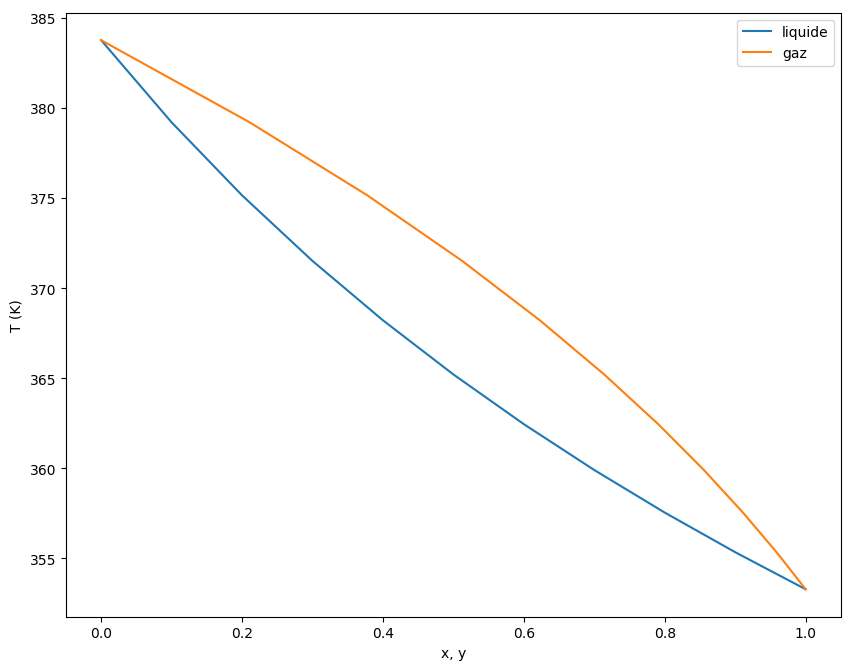

In [85]:
import matplotlib.pylab as plt

plt.figure(1, figsize=(10, 8), dpi=100)
plt.plot(xs, Ts, ys, Ts)
plt.ylabel('T (K)')
plt.xlabel("x, y")
plt.legend(['liquide', 'gaz'])
plt.show()




In [86]:
help(plt.grid)

Help on function grid in module matplotlib.pyplot:

grid(b=None, which='major', axis='both', **kwargs)
    Turn the axes grids on or off.
    
    Set the axes grids on or off; *b* is a boolean.  (For MATLAB
    compatibility, *b* may also be a string, 'on' or 'off'.)
    
    If *b* is *None* and ``len(kwargs)==0``, toggle the grid state.  If
    *kwargs* are supplied, it is assumed that you want a grid and *b*
    is thus set to *True*.
    
    *which* can be 'major' (default), 'minor', or 'both' to control
    whether major tick grids, minor tick grids, or both are affected.
    
    *axis* can be 'both' (default), 'x', or 'y' to control which
    set of gridlines are drawn.
    
    *kwargs* are used to set the grid line properties, e.g.,::
    
       ax.grid(color='r', linestyle='-', linewidth=2)
    
    Valid :class:`~matplotlib.lines.Line2D` kwargs are
    
      agg_filter: unknown
      alpha: float (0.0 transparent through 1.0 opaque) 
      animated: [True | False] 
     